#Imports and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import accuracy_score
import sklearn.decomposition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from time import time
import math as math

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist;
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data();
"""
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
"""

label_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal',
             'Shirt','Sneaker','Bag','Ankle boot']

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train = np.zeros([60000,784]) 
for i in range(60000): 
    img=train_images[i,:,:]
    X_train[i,:] = img.reshape([784])

X_test = np.zeros([10000,784]) 
for i in range(10000):
    img=test_images[i,:,:]
    X_test[i,:] = img.reshape([784])

#Standardization
train_mean = np.mean(X_train,axis=0)
test_mean = np.mean(X_test,axis=0)
train_s = np.std(X_train,axis=0)
test_s = np.std(X_test,axis=0)

X_train = (X_train - train_mean)/train_s
X_test = (X_test - test_mean)/test_s

In [ ]:
col_means = np.mean(X_train, axis = 0)
X_tilda = X_train - col_means
X_test_centered = X_test - col_means

k=190
PCA = sklearn.decomposition.PCA(n_components = k)
PCA.fit(X_tilda)
Y_train = PCA.transform(X_tilda)
Y_test = PCA.transform(X_test_centered)

#2

In [ ]:
#SVM
Cs =  [-4,-3,-2,-1,0,1,2,3,4,5]
scores = []

for e in Cs:
    C = 2**e
    SVM = sklearn.svm.SVC(kernel = 'linear',C = C)
    SVM.fit(Y_train, train_labels)
    preds = SVM.predict(Y_test)
    score = accuracy_score(y_true = test_labels, y_pred = preds)
    scores.append(score)


error = 1-np.array(scores)

plt.plot(Cs, error)
plt.xlabel('Exponent of 2')
plt.ylabel('Accuracy')
plt.title('SVM with Linear Kernel')

Text(0.5, 1.0, 'SVM with Linear Kernel')

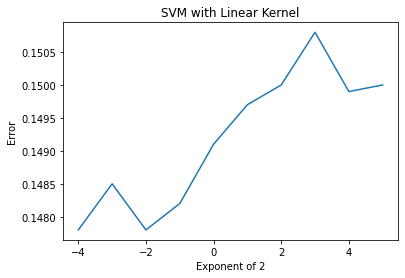

In [2]:
scores =[0.8522,0.8515,0.8522,0.8518,0.8509,
         0.8503,0.85  ,0.8492,0.8501,0.85  ]
error = 1-np.array(scores)
Cs =  [-4,-3,-2,-1,0,1,2,3,4,5]


plt.plot(Cs, error)
plt.xlabel('Exponent of 2')
plt.ylabel('Error')
plt.title('SVM with Linear Kernel')


#3

In [ ]:
Cs = [-4,-3,-2,-1,0,1,2,3,4,5]
scores = []

for x,e in enumerate(Cs):
    C = 2**e
    SVM = sklearn.svm.SVC(kernel = 'poly',degree=3, C=C)
    SVM.fit(Y_train, train_labels)
    preds = SVM.predict(Y_test)
    score = accuracy_score(y_true = test_labels, y_pred = preds)
    print(score)
    scores.append(score)

error = 1-np.array(scores)

plt.plot(Cs, error)
plt.xlabel('Exponent of 2')
plt.ylabel('Error')
plt.title('SVM with Polynomial Kernel')

#4

In [ ]:
Cs =  [-4,-3,-2,-1,0,1,2,3,4,5]
scores = []
for e in Cs:
    C = 2**e
    SVM = sklearn.svm.SVC(kernel = 'rbf', gamma = 'scale',C=C) #gamma = 1/(2*sigma^2)
    SVM.fit(Y_train, train_labels)
    preds = SVM.predict(Y_test)
    score = accuracy_score(y_true = test_labels, y_pred = preds)
    scores.append(score)


error = 1-np.array(scores)

plt.plot(Cs, error)
plt.xlabel('Exponent of 2')
plt.ylabel('Error')
plt.title('SVM with Gaussian Kernel')